# Аналитика в авиакомпании

В результате предварительного парсинга и SQL-запросов данные об авиарейсах компании F9 сформированы в двух таблицах. 

Первая содержит модели самолетов и количество рейсов, совершенных для каждой модели в сентябре 2018 года. Вторая таблица содержит список городов и среднее число рейсов, прибывающих в город за день в августе 2018 года.

Определим популярные модели самолетов, как распределено число полётов в зависимости от города назначения и топ-10 городов по числу рейсов.  

## Загрузка и обзор данных

Загрузка необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузка данных, обзор и вывод таблицы:

In [2]:
aircrafts = pd.read_csv('datasets/query_1.csv')
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Таблица состоит  из двух стоблбцов  - модель самолёта и число полётов. Таблица содержит 8 строк, пустых значений нет, типы данных корректные.

In [4]:
cities = pd.read_csv('datasets/query_3.csv')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
cities.sample(10)

,city,average_flights
39,Магнитогорск,4.000000
94,Челябинск,6.709677
69,Самара,3.000000
85,Урай,2.000000
47,Нарьян-Мар,2.612903
17,Геленджик,2.590909
44,Мурманск,2.000000
74,Сочи,9.612903
2,Анапа,2.161290
65,Петропавловск-Камчатский,1.000000


Таблица состоит из двух столбцов  - название города и среднее число рейсов, прибывающих в город за день. Таблица содержит 101 строку, пустых значений нет, типы данных корректные. Проверим данные на дубликаты

In [6]:
cities.duplicated().sum()

0

Дубликатов не обнаружено.

**Вывод:**

Полученные данные представлены в корректном виде, пропусков и дубликатов нет, можно переходить к анализу.

## Анализ данных

### Зависимость числа рейсов, от модели самолёта

Определим, на каких самолётах чаще совершали рейсы в августе 2018 года, построим график распределения числа рейсов в зависимости от модели самолета:

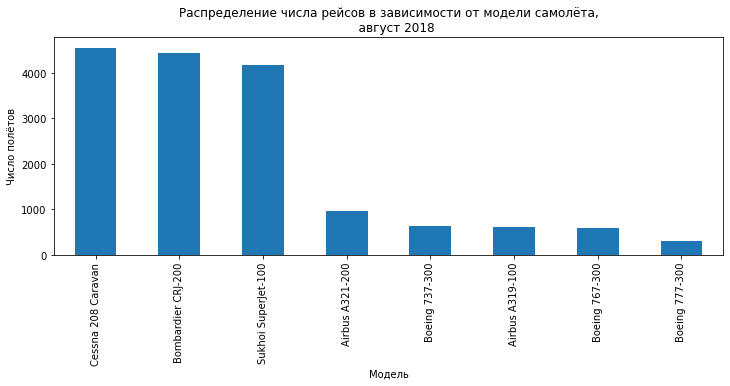

In [7]:
aircrafts.sort_values(by = 'flights_amount', ascending = False).plot(x= 'model', y = 'flights_amount', kind = 'bar', figsize = (12, 4), legend=False)

plt.ylabel('Число полётов')
plt.xlabel('Модель')
plt.title(
    """Распределение числа рейсов в зависимости от модели самолёта,
    август 2018""")
plt.show()

**Вывод:**

В августе 2018 года, основная часть рейсов совершена на самолетах моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Вероятно, эти модели, обладая малой пассажировместимостью, совершали более короткие, но частые рейсы.

### Топ-10 городов по количеству рейсов

Построим график распределения числа рейсов по городам:

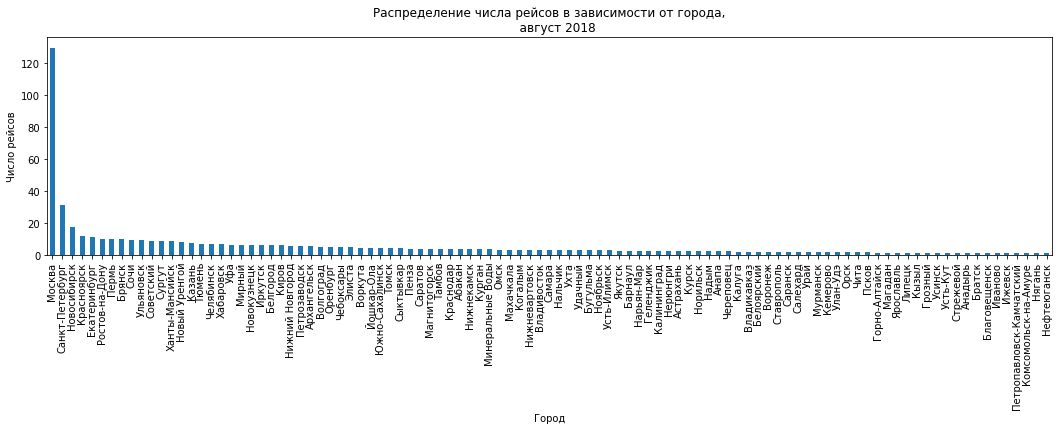

In [8]:
cities.sort_values(by = 'average_flights', ascending = False).plot(
    x= 'city', 
    y = 'average_flights', 
    kind = 'bar', 
    figsize = (18, 4),
    legend=False
)

plt.ylabel('Число рейсов')
plt.xlabel('Город')
plt.title(
    """Распределение числа рейсов в зависимости от города,
    август 2018""")
plt.show()

Выберем топ-10 городов по количеству рейсов:

In [9]:
city_top10 = cities.sort_values(by = 'average_flights', ascending = False).head(10).reset_index(drop=True)
city_top10['average_flights'] = city_top10['average_flights'].round()
city_top10

,city,average_flights
0,Москва,130.0
1,Санкт-Петербург,31.0
2,Новосибирск,17.0
3,Красноярск,12.0
4,Екатеринбург,11.0
5,Ростов-на-Дону,10.0
6,Пермь,10.0
7,Брянск,10.0
8,Сочи,10.0
9,Ульяновск,10.0


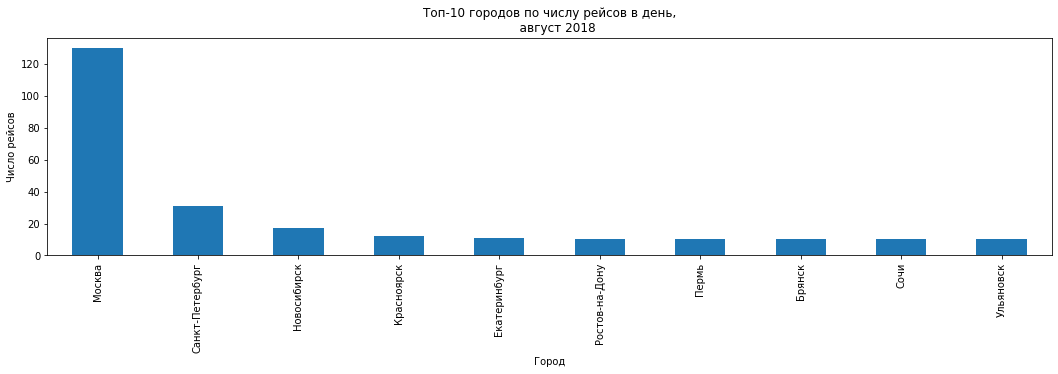

In [11]:
city_top10.plot(
    x= 'city', 
    y = 'average_flights', 
    kind = 'bar', 
    figsize = (18, 4),
    legend=False
)

plt.ylabel('Число рейсов')
plt.xlabel('Город')
plt.title(
    """Топ-10 городов по числу рейсов в день,
    август 2018""")
plt.show()

**Вывод:**

В топ-10 городов по числу совершенных рейсов вошли:
- Москва
- Санкт-Петербург
- Новосибирск
- Красноярск
- Екатеринбург
- Ростов-на-Дону
- Пермь
- Брянск
- Сочи
- Ульяновск

Первое место ожидаемо занимает Москва. Помимо статуса столицы и самого крупного населения по стране, Москва имеет большее число аэропортов. В среднем, Москва принимала в августе 2018 года 130 рейсов в день. На втором месте Санкт-Петербург (31), следом Новосибирск (17) Замыкает рейтинг Ульяновск - в среднем 10 рейсов в день, что на 120 меньше, чем у Москвы.

## Общий вывод

Данные, сформированные в результате парсинга и SQL-запросов представлены в корректном виде, без пропущенных значений и дубликатов.

По полученным данным построены графики распределения числа рейсов в зависимости от модели самолета и города прибытия. Определены города с наибольшим средним числом рейсов в день в августе 2018 года.

В августе 2018 года, основная часть рейсов совершена на самолетах моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Вероятно, эти модели, обладая малой пассажировместимостью, совершали более короткие, но частые рейсы.

Первое место по числу совершенных рейсов занимает Москва. Помимо статуса столицы и самого крупного населения по стране, Москва имеет большее число аэропортов. В среднем, Москва принимала в августе 2018 года почти 130 рейсов в день (129.8). На втором месте Санкт-Петербург (31.2), следом Новосибирск (17.3) Замыкает рейтинг Ульяновск - в среднем 9.5 рейсов в день, что на 120 меньше, чем у Москвы.